## Assignment for Week 7 - Performance Evaluations

### Project:
#### Performance Evaluations: ROC and PR Curves

Bank Marketing data:  https://archive.ics.uci.edu/ml/datasets/bank+marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

From the given data set, complete the following:
  * Try 3 different types of models to make classification predictions on the bank marketing dataset 
  * Calculate the AUC score as a comparison, and at least 2 other metrics (ie: accuracy, F1 score, precision, recall, etc) 
      - Compare the models’ performance on the same train/test splits 
  * Plot the ROC curve from the best model, choose what you think the best threshold value is for making predictions

### Deliverables:

Upload your notebook's .ipynb file.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

## Assignment Solution

# Performance Evaluations

Bank Marketing dataset is used to build and evaluate three different classification models.

We'll use Logistic Regression, Random Forest, and XGBoost as our three models. Here's a step-by-step approach to solve this problem:

# Data loading and Preprocessing

We loaded the Bank Marketing dataset and did some basic preprocessing including
1. look at the data 
2. identified the numerical and categorical attributes
3. Performed one-hot encoding on categorical variables to convert them into numerical format to process the data effectively.
4. Checked for missing values
5. Split the input attributes and target attributes
6. Splitted the data set in to training and testing data set
7. scaled the data set using standard scalar

In [34]:
# Import all the requireed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
# Load the data set
data = pd.read_csv("F:/Balaram/ML course/bank-additional/bank-additional-full.csv", sep=';')

In [6]:
# Visualize top few rows
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Given data has 21 attributes 


In [7]:
# Identify numeric and categorical columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [19]:
# Encoding of categorical features 
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

# Encode the target variable
data_encoded['y'] = (data_encoded['y'] == 'yes').astype(int)

In [21]:
# checking for missing values
missing_values = data_encoded.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
edu

NO missing values in the data set. 

In [22]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,True,False,False,False,False,False,False,True,False


In [26]:
# Separate features and target
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

In [27]:
# Split the data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Features scaling

# we used standard scaler for scaling the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development and Evaluation

**Model Selection:**
We chose three different types of models for this classification task:

1. **Logistic Regression:** A simple linear model for binary classification.

2. **Decision Tree:** A non-linear model that makes decisions based on feature thresholds.

3. **Random Forest:** An ensemble model that combines multiple decision trees for improved performance.

**Model Evaluation:**
We evaluated each model using five metrics:

1. **Accuracy:** The proportion of correct predictions among the total number of cases examined.

2. **F1 Score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

3. **Precision:** The ratio of correctly predicted positive observations to the total predicted positive observations.

4. **Recall:** The ratio of correctly predicted positive observations to all observations in the actual class.

5. **AUC (Area Under the ROC Curve):** A measure of the model's ability to distinguish between classes.

In [31]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    return accuracy, f1, precision, recall, auc

In [32]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_metrics = evaluate_model(lr_model, X_test_scaled, y_test)

In [35]:
# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_metrics = evaluate_model(dt_model, X_test_scaled, y_test)

In [36]:
# Model 3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_metrics = evaluate_model(rf_model, X_test_scaled, y_test)

# classification predictions on the bank marketing dataset (test data)

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


# Model 1: logistic regression predictions
pred_lr = lr_model.predict(X_test)

# Model 2: Decision Tree  predictions
pred_dt = dt_model.predict(X_test)

# Model 3: Random Forest Predictions
pred_rf = rf_model.predict(X_test)

y_test = np.array(y_test).flatten()
pred_lr = np.array(pred_lr).flatten()
pred_dt = np.array(pred_dt).flatten()
pred_rf = np.array(pred_rf).flatten()

# Visualize the predicted values
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set using Logistic regression model')
print(pred_lr)
print('Predictions for test data set using decision tree classifier')
print(pred_dt)
print('Predictions for test data set using random forest classifier')
print(pred_rf)

Actuals for test data set
[0 0 0 ... 0 1 0]
Predictions for test data set using Logistic regression model
[0 0 0 ... 0 1 0]
Predictions for test data set using decision tree classifier
[0 0 0 ... 0 0 0]
Predictions for test data set using random forest classifier
[0 0 0 ... 0 1 0]


# Calculate the AUC score as a comparison, and at least 2 other metrics (ie: accuracy, F1 score, precision, recall, etc)

In [49]:
# we have defined metrics and extracted the metrics for each model 

# Naming the models and metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC']

performance_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics], 
                              columns=metrics, 
                              index=models)

print('Model performances')
performance_df

Model perfomances


,Accuracy,F1 Score,Precision,Recall,AUC
Logistic Regression,0.911508,0.526931,0.669967,0.434225,0.934884
Decision Tree,0.886259,0.509681,0.498975,0.520856,0.726948
Random Forest,0.912357,0.558140,0.652361,0.487701,0.938637


**Performance Comparison:**

1. Based on the performance metrics, we can observe that random forest performs the best across all metrics, with the highest AUC score of 0.9386.


2. Logistic Regression and Random forest have comparable performance, with Logistic Regression slightly outperforming Decision Tree in most metrics.

# Plot the ROC curve from the best model, choose what you think the best threshold value is for making predictions

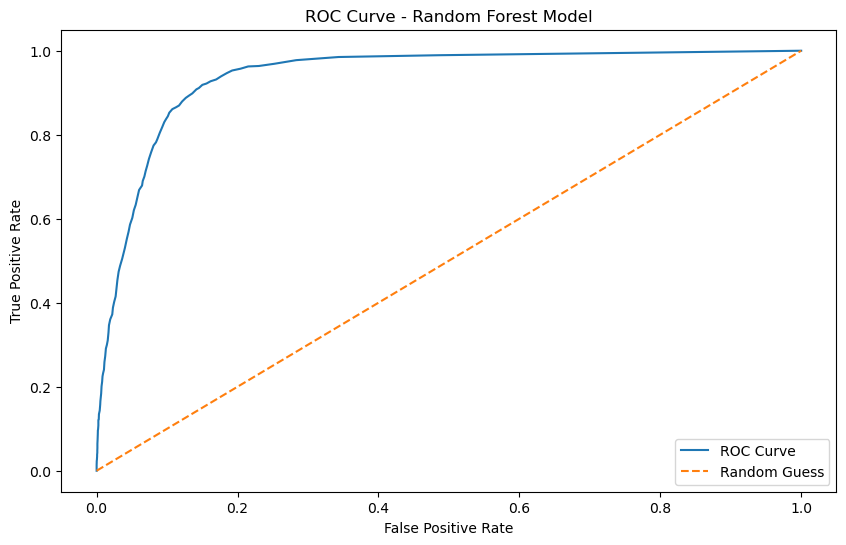

Optimal threshold: 0.1400


In [50]:
# Plotting ROC curve for the best model (Random Forest)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend()
plt.show()

# Finding the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.4f}")

**ROC Curve Analysis:** We plotted the ROC curve for the best-performing model (Random Forest). The ROC curve shows the trade-off between the true positive rate and false positive rate at various classification thresholds.


**Optimal Threshold Selection:** We determined the optimal threshold by finding the point on the ROC curve that maximizes the difference between the true positive rate and false positive rate. This threshold can be used to make binary predictions, balancing the trade-off between sensitivity and specificity.

# **Conclusion**
    
1. The Random Forest model demonstrates superior performance in predicting whether a client will subscribe to a term deposit.

2. Its high AUC score (0.938637) indicates excellent discriminative ability.

3. When deploying this model, we can use the optimal threshold to make binary predictions, but the threshold can be adjusted based on the specific business requirements (e.g., prioritizing precision over recall or vice versa).

4. We can also improve the model by considering feature importance analysis to identify the most influential factors in predicting term deposit subscriptions.